# Problem Statement:


Yulu, India's leading micro-mobility service provider, is facing a decline in revenues and wants to understand the factors affecting the demand for shared electric cycles in the Indian market.

In [1]:
# Importing the necessary Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

/Users/pushpa/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [3]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
df.info() # datetime is having object data type which needs to be converted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df. shape

(10886, 12)

In [6]:
df.tail(10)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,185,218
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,209,237
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [7]:
df.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
df.value_counts('datetime').sum()

10886

In [9]:
df.value_counts()

datetime             season  holiday  workingday  weather  temp   atemp   humidity  windspeed  casual  registered  count
2011-01-01 00:00:00  1       0        0           1        9.84   14.395  81        0.0000     3       13          16       1
2012-05-01 21:00:00  2       0        1           1        26.24  30.305  65        8.9981     31      251         282      1
2012-05-01 13:00:00  2       0        1           2        29.52  33.335  51        15.0013    41      208         249      1
2012-05-01 14:00:00  2       0        1           2        30.34  33.335  48        16.9979    37      167         204      1
2012-05-01 15:00:00  2       0        1           2        30.34  33.335  45        15.0013    48      186         234      1
                                                                                                                           ..
2011-09-02 04:00:00  3       0        1           1        24.60  28.030  83        6.0032     2       2           4       

In [10]:
df.casual.unique().sum()

48732

In [11]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [12]:
df.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [13]:
df.isna().sum() # no NA values


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
df.isnull().sum() # no null values


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [15]:
pd.to_datetime(df['datetime'])


0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [17]:
df.duplicated().sum() # no duplicates


0

In [18]:
df.nunique()


datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

season, holiday, workingday & weather is having low cardinality so converting them to categorical would be 
the appropriate step to do for further analysis

In [19]:
# Define the columns to convert to 'category'
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

# Convert the specified columns to 'category' data type
df[categorical_columns] = df[categorical_columns].astype('category')

# Verify the changes
print(df.dtypes)

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object


In [20]:
# Convert 'datetime' column to datetime data type
df['datetime'] = pd.to_datetime(df['datetime'])

# Verify the changes
print(df.dtypes)

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [21]:
# Renaming the 'atemp' column to 'feels_like_temp'
df = df.rename(columns={'atemp': 'feels_like_temp'})

# Verify 
print(df.head()) 

             datetime season holiday workingday weather  temp  \
0 2011-01-01 00:00:00      1       0          0       1  9.84   
1 2011-01-01 01:00:00      1       0          0       1  9.02   
2 2011-01-01 02:00:00      1       0          0       1  9.02   
3 2011-01-01 03:00:00      1       0          0       1  9.84   
4 2011-01-01 04:00:00      1       0          0       1  9.84   

   feels_like_temp  humidity  windspeed  casual  registered  count  
0           14.395        81        0.0       3          13     16  
1           13.635        80        0.0       8          32     40  
2           13.635        80        0.0       5          27     32  
3           14.395        75        0.0       3          10     13  
4           14.395        75        0.0       0           1      1  


In [22]:
df.corr(method='pearson')
'''Observations: feels_like_temp & temp is having high corelation and the casual users and registered users 
are having a high corelation on windspeed as well as the count.'''


'Observations: feels_like_temp & temp is having high corelation and the casual users and registered users \nare having a high corelation on windspeed as well as the count.'

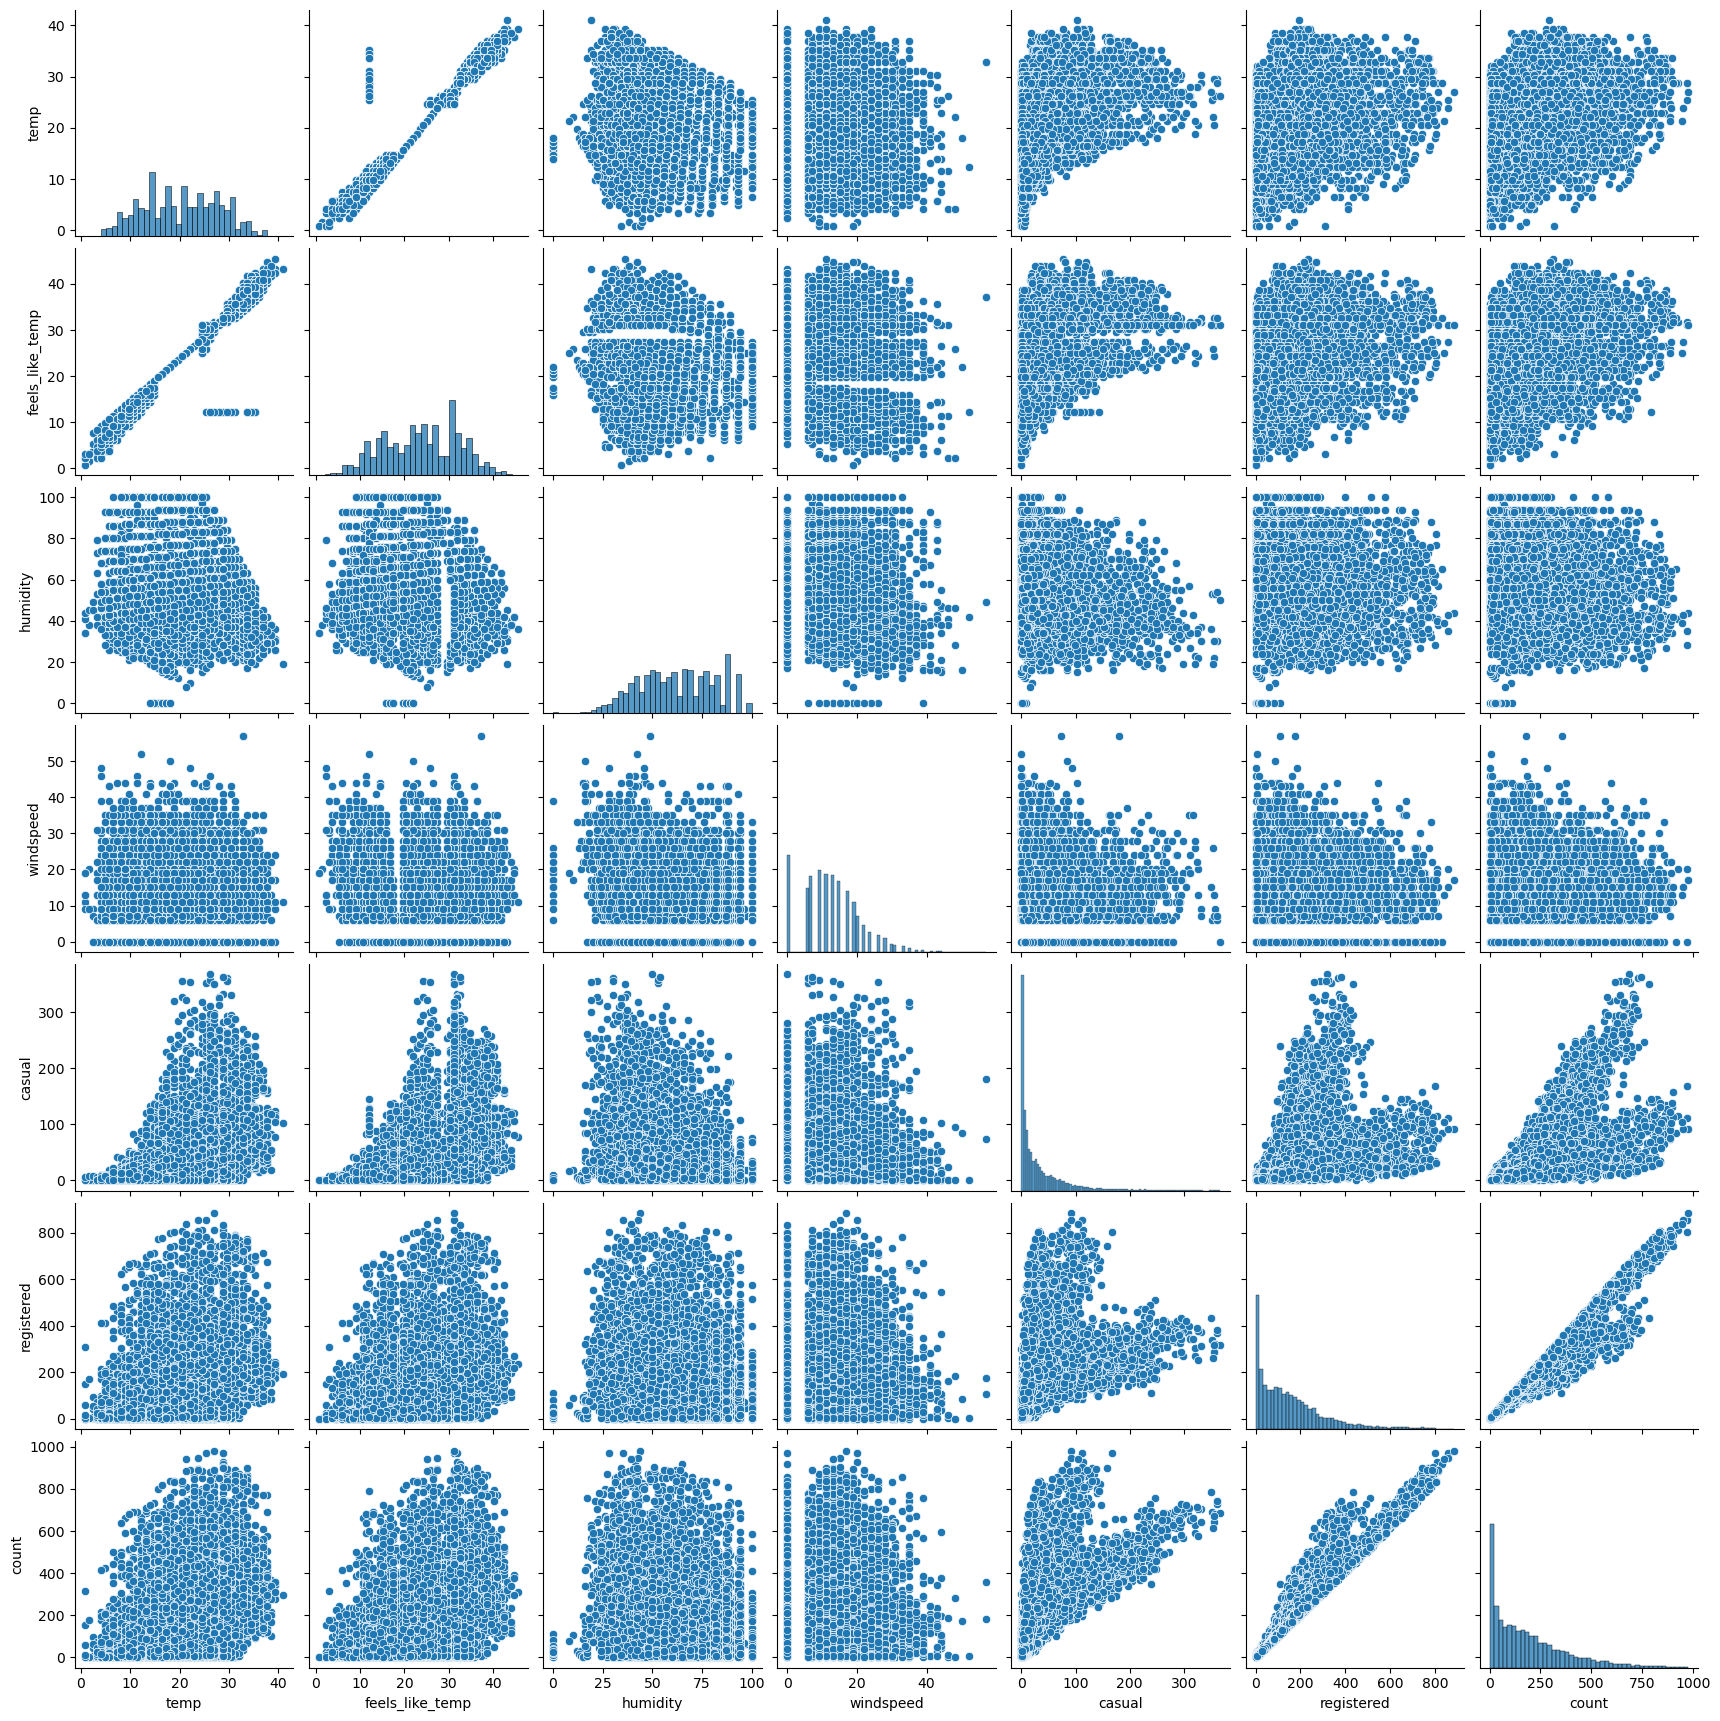

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
a = df['temp'].mean()
print(f'mean of temp: {a}')
a = df['feels_like_temp'].mean()
print(f'mean of feels_like_temp: {a}')
a = df['humidity'].mean()
print(f'mean of humidity: {a}')

mean of temp: 20.230859819952173
mean of feels_like_temp: 23.65508405291192
mean of humidity: 61.88645967297446


In [25]:
a1 = df['temp'].median()
print(f'median of temp: {a1}')
a1 = df['feels_like_temp'].median()
print(f'median of feels_like_temp: {a1}')
a2 = df['humidity'].median()
print(f'median of humidity: {a2}')

median of temp: 20.5
median of feels_like_temp: 24.24
median of humidity: 62.0


In [26]:
a11 = df['temp'].mode()
print(f'mode of temp: {a11}')
a12 = df['feels_like_temp'].mode()
print(f'mode of feels_like_temp: {a12}')
a13 = df['humidity'].mode()
print(f'mode of humidity: {a13}')

mode of temp: 0    14.76
Name: temp, dtype: float64
mode of feels_like_temp: 0    31.06
Name: feels_like_temp, dtype: float64
mode of humidity: 0    88
Name: humidity, dtype: int64


# Univariate Analysis

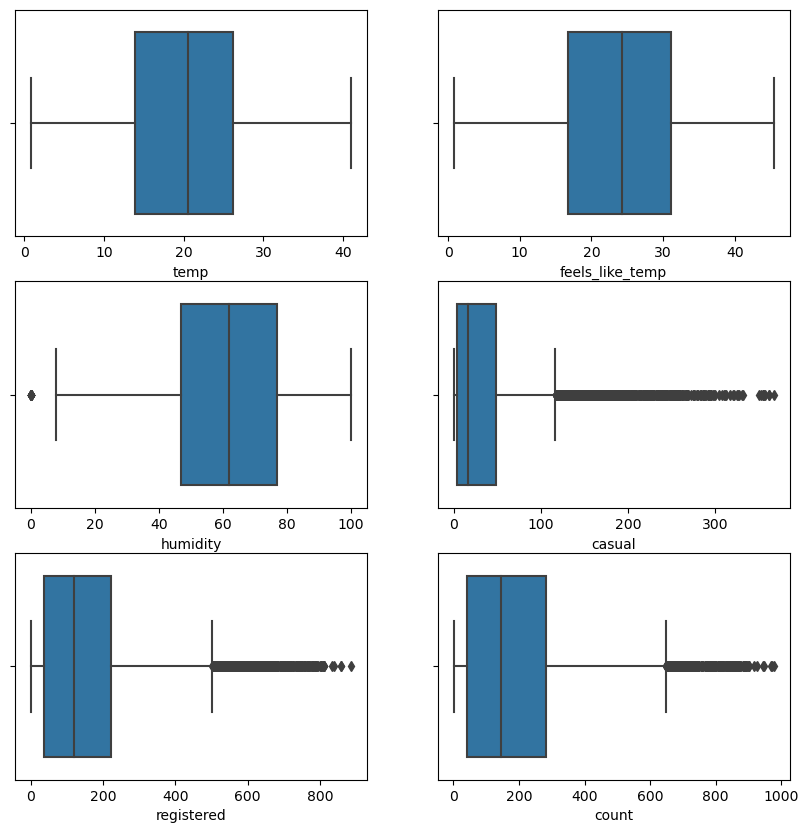

In [27]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
sns.boxplot(data=df, x='temp', orient='h', ax=axis[0,0])
sns.boxplot(data=df, x='feels_like_temp', orient='h', ax=axis[0,1])
sns.boxplot(data=df, x='humidity', orient='h', ax=axis[1,0])
sns.boxplot(data=df, x='casual', orient='h', ax=axis[1,1])
sns.boxplot(data=df, x='registered', orient='h', ax=axis[2,0])
sns.boxplot(data=df, x='count', orient='h', ax=axis[2,1])
plt.show()

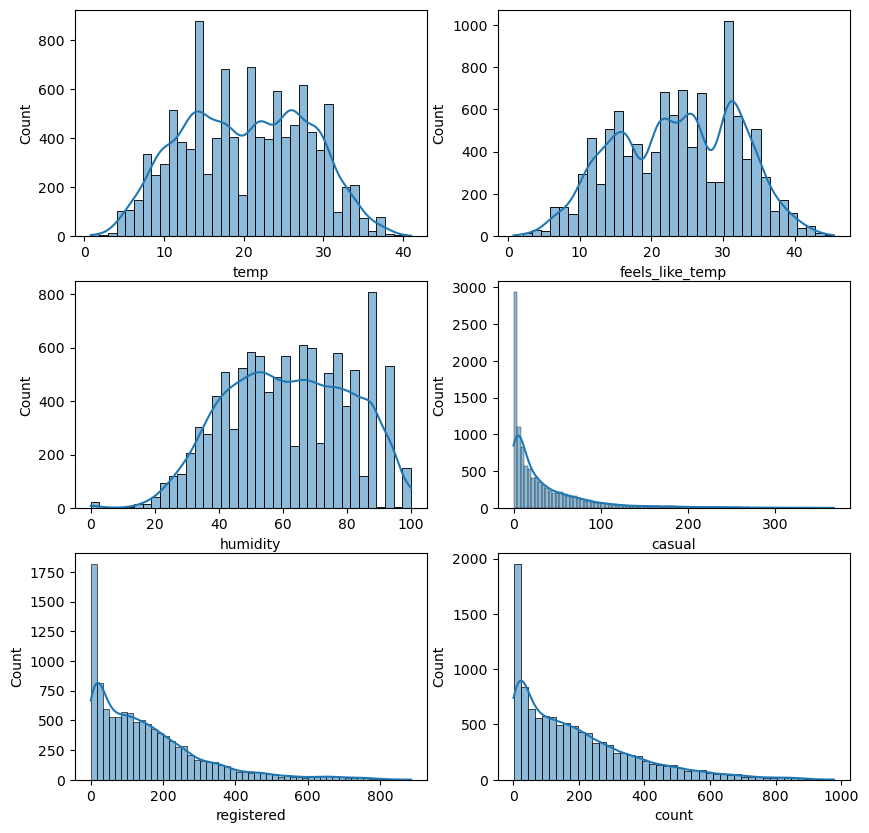

In [28]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
sns.histplot(data=df, x='temp', kde=True, ax=axis[0,0])
sns.histplot(data=df, x='feels_like_temp', kde=True, ax=axis[0,1])
sns.histplot(data=df, x='humidity', kde=True, ax=axis[1,0])
sns.histplot(data=df, x='casual', kde=True, ax=axis[1,1])
sns.histplot(data=df, x='registered', kde=True, ax=axis[2,0])
sns.histplot(data=df, x='count', kde=True, ax=axis[2,1])
plt.show()

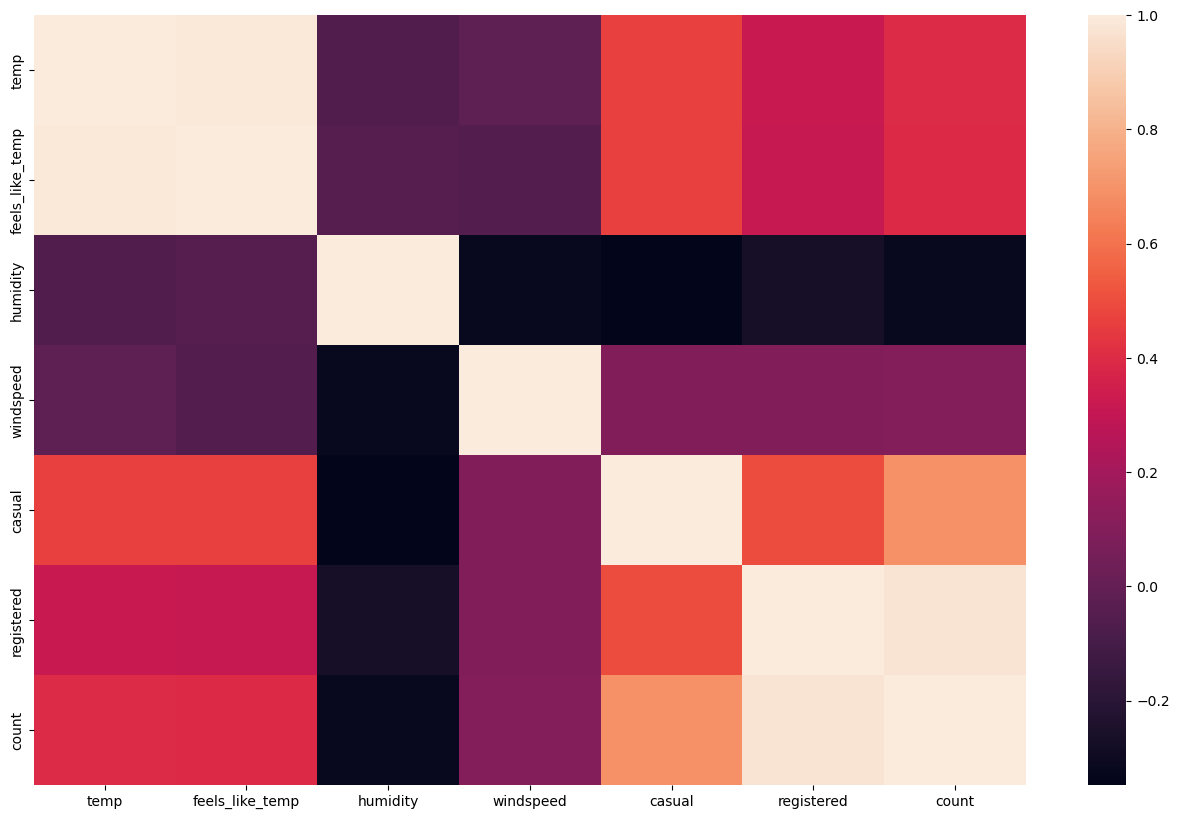

In [29]:
cor = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)
plt.show()

# Bivariate Analysis

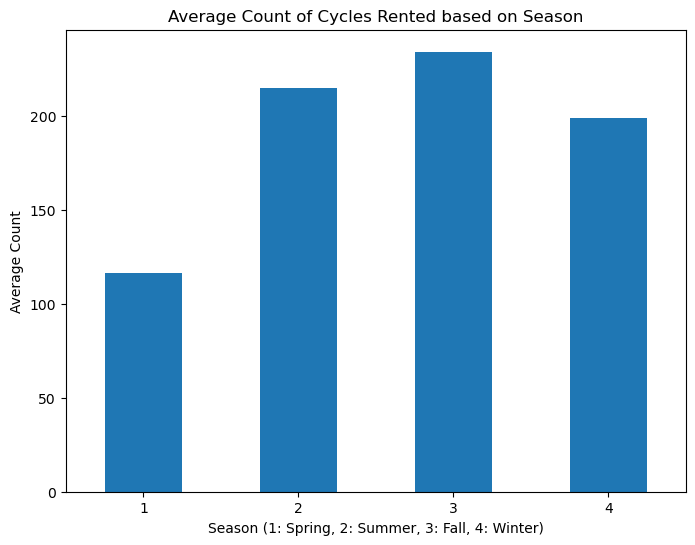

'The avg count of cycles rented were at the most during Fall closely followed by spring and winter and \nspring season tends to dry up the business'

In [30]:
# Bivariate Analysis for "Season" vs. "Count"
plt.figure(figsize=(8, 6))
df.groupby('season')['count'].mean().plot(kind='bar')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Count')
plt.title('Average Count of Cycles Rented based on Season')
plt.xticks(rotation=0)
plt.show()
'''The avg count of cycles rented were at the most during Fall closely followed by spring and winter and 
spring season tends to dry up the business'''

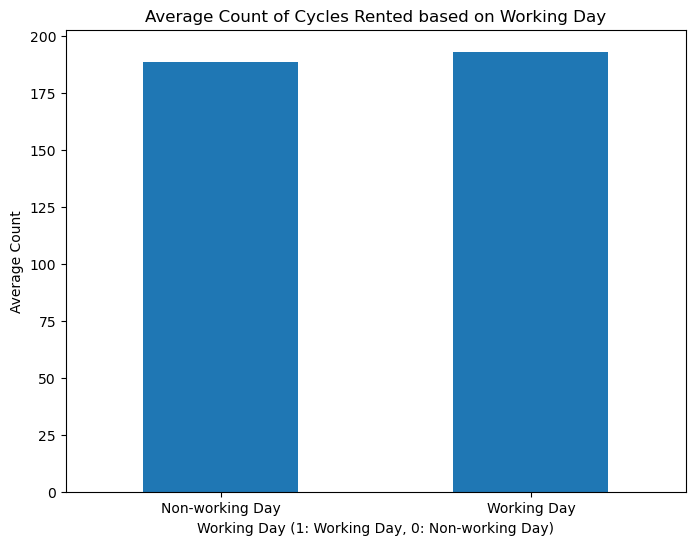

In [31]:
# Bivariate Analysis for "Workingday" vs. "Count"
plt.figure(figsize=(8, 6))
df.groupby('workingday')['count'].mean().plot(kind='bar')
plt.xlabel('Working Day (1: Working Day, 0: Non-working Day)')
plt.ylabel('Average Count')
plt.title('Average Count of Cycles Rented based on Working Day')
plt.xticks([0, 1], ['Non-working Day', 'Working Day'], rotation=0)
plt.show()
# Not much difference when it comes to a day being working day or not.

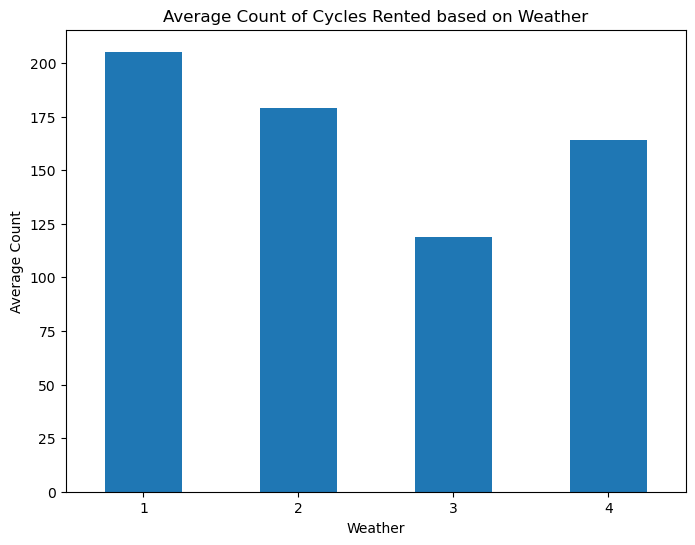

In [32]:
# Bivariate Analysis for "Weather" vs. "Count"
plt.figure(figsize=(8, 6))
df.groupby('weather')['count'].mean().plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('Average Count')
plt.title('Average Count of Cycles Rented based on Weather')
plt.xticks(rotation=0)
plt.show()

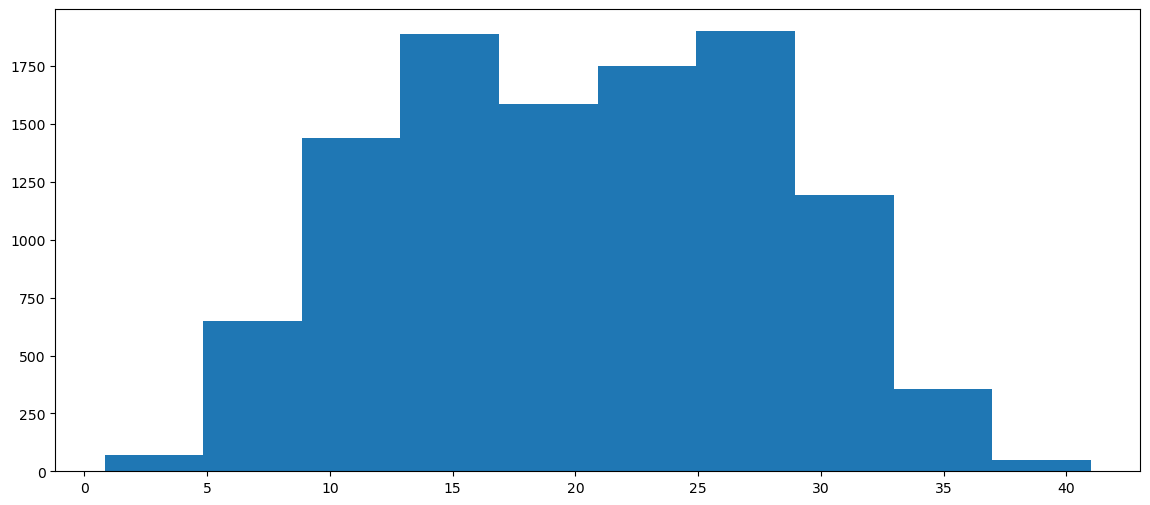

In [33]:
%matplotlib inline
plt.figure(figsize=(14,6))
plt.hist(df['temp'])
plt.show()

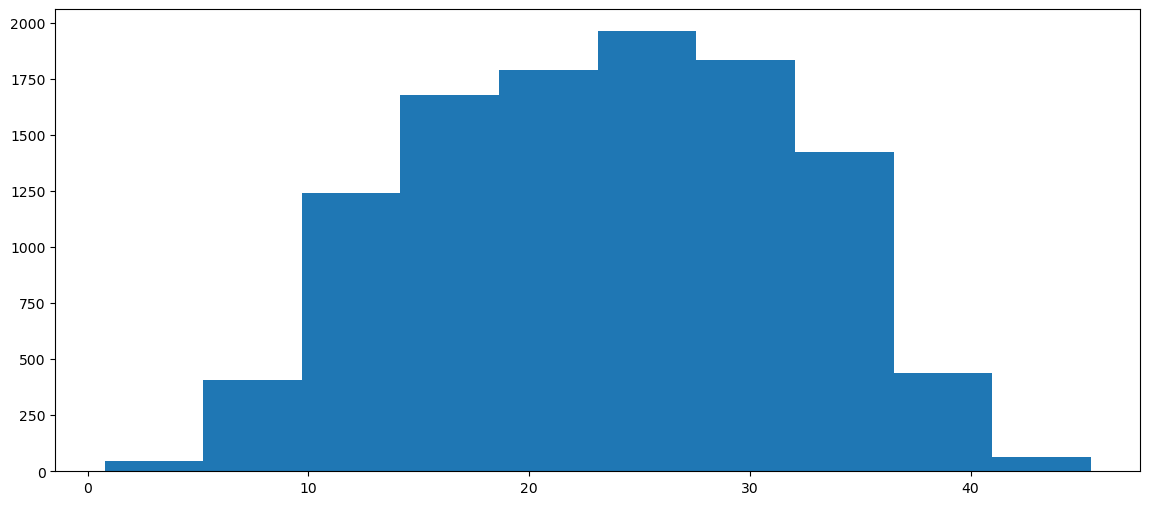

In [34]:
plt.figure(figsize=(14,6))
plt.hist(df['feels_like_temp'])
plt.show()

# Hypothesis Testing

In [35]:
# Checking whether the data is normally distributed.
from scipy.stats import shapiro
data = df['temp']
stat, p = shapiro(data)
print('stat=%.2f, p=%.30f' % (stat,p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not a Normal Distribution')


stat=0.98, p=0.000000000000000000000000000000
Not a Normal Distribution


/Users/pushpa/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [36]:
from scipy.stats import shapiro
data = df['count']
stat, p = shapiro(data)
print('stat=%.2f, p=%.30f' % (stat,p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not a Normal Distribution')

stat=0.88, p=0.000000000000000000000000000000
Not a Normal Distribution


2-Sample T-Test:

To check if a day being Working Day has an effect on the number of electric cycles rented.

In [37]:
from scipy.stats import ttest_ind

# Perform the 2-sample T-test
workingday_0 = df[df['workingday'] == 0]['count']
workingday_1 = df[df['workingday'] == 1]['count']

t_stat, p_value = ttest_ind(workingday_0, workingday_1)

# Print the test results
print("2-Sample T-Test (Working Day vs. Count):")
print("T-statistic:", t_stat)
print("P-value:", p_value)


2-Sample T-Test (Working Day vs. Count):
T-statistic: -1.2096277376026694
P-value: 0.22644804226361348


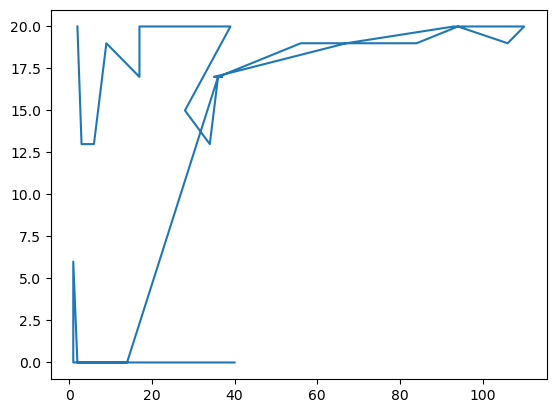

In [38]:
one = df[1:30]['count']
two = df[1:30]['windspeed']
plt.plot(one,two)
plt.show()

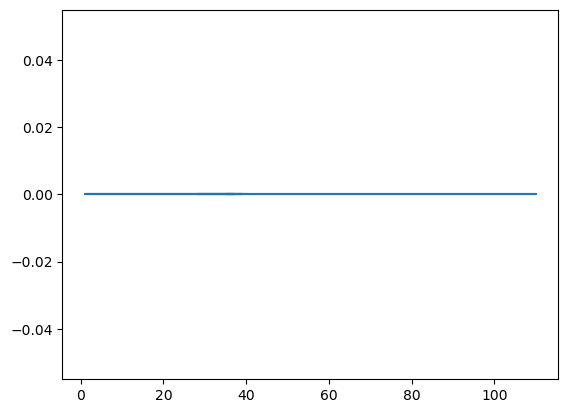

In [39]:
one = df[1:30]['count']
two = df[1:30]['workingday']
plt.plot(one,two)
plt.show()

2-Sample T-Test (Working Day vs. Number of Cycles Rented):

Null Hypothesis (H0): There is no significant difference in the number of cycles rented between working days 
and non-working days.
Alternate Hypothesis (H1): There is a significant difference in the number of cycles rented between working 
days and non-working days.


To check if the number of cycles rented is similar or different in different seasons and weather.

In [40]:
from scipy.stats import f_oneway

# Perform ANOVA for Seasons
seasons = df['season'].unique()
anova_seasons = [df[df['season'] == season]['count'] for season in seasons]
anova_seasons_result = f_oneway(*anova_seasons)

# Perform ANOVA for Weather
weathers = df['weather'].unique()
anova_weather = [df[df['weather'] == weather]['count'] for weather in weathers]
anova_weather_result = f_oneway(*anova_weather)

# Print the ANOVA results
print("\nANOVA (Seasons vs. Count):")
print("F-statistic:", anova_seasons_result.statistic)
print("P-value:", anova_seasons_result.pvalue)

print("\nANOVA (Weather vs. Count):")
print("F-statistic:", anova_weather_result.statistic)
print("P-value:", anova_weather_result.pvalue)


ANOVA (Seasons vs. Count):
F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149

ANOVA (Weather vs. Count):
F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
